# Exploratory Data Analysis (EDA) on Cleaned Coffee Sales Dataset

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Coffee_clean_data.csv")

# Basic Statistics

In [10]:
print("BASIC STATISTICS: ")
print(df.describe(include='all'))

# Central Tendency
print("\n Mean values: ")
print(df.mean(numeric_only=True))
print("\n Median values: ")
print(df.median(numeric_only=True))
print("\n Max values: ")
print(df.max(numeric_only=True))
print("\n Min values: ")
print(df.min(numeric_only=True))

BASIC STATISTICS: 
        Unnamed: 0  hour_of_day cash_type        money          coffee_name  \
count   3547.00000  3547.000000      3547  3547.000000                 3547   
unique         NaN          NaN         1          NaN                    8   
top            NaN          NaN      Card          NaN  Americano With Milk   
freq           NaN          NaN      3547          NaN                  809   
mean    1773.00000    14.185791       NaN    31.645216                  NaN   
std     1024.07503     4.234010       NaN     4.877754                  NaN   
min        0.00000     6.000000       NaN    18.120000                  NaN   
25%      886.50000    10.000000       NaN    27.920000                  NaN   
50%     1773.00000    14.000000       NaN    32.820000                  NaN   
75%     2659.50000    18.000000       NaN    35.760000                  NaN   
max     3546.00000    22.000000       NaN    38.700000                  NaN   

       Time_of_Day Weekday Month

# Outlier Detection (IQR Method)

In [11]:
# Select numeric columns only
numeric_df = df.select_dtypes(include='number')

# Calculate IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Detect outliers
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()

print("\n Outlier counts: ")
print(outliers)


 Outlier counts: 
Unnamed: 0     0
hour_of_day    0
money          0
dtype: int64


# Correlation Matrix

In [12]:
print("\n Correlation matrix: ")
print(df.corr(numeric_only=True))


 Correlation matrix: 
             Unnamed: 0  hour_of_day     money
Unnamed: 0     1.000000    -0.062117 -0.074327
hour_of_day   -0.062117     1.000000  0.202748
money         -0.074327     0.202748  1.000000


# Visualizations

# Histogram

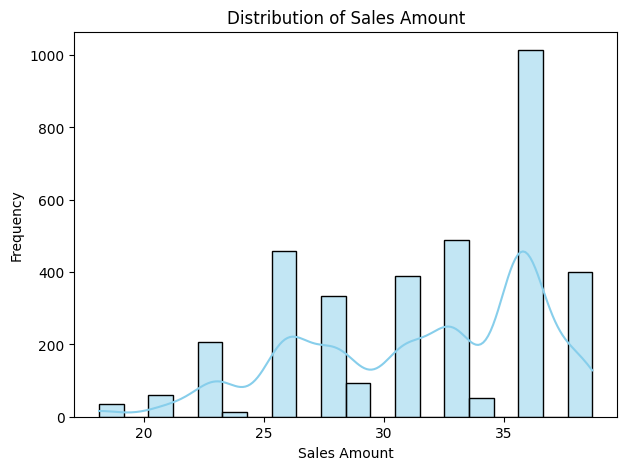

In [13]:
plt.figure(figsize=(7,5))
sns.histplot(df['money'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Sales Amount")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.savefig("Distribution of sale amount")

# Bar Chart

C:\Users\NEXUS\AppData\Local\Temp\ipykernel_788\4239529835.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='coffee_name', order=df['coffee_name'].value_counts().index, palette='viridis')


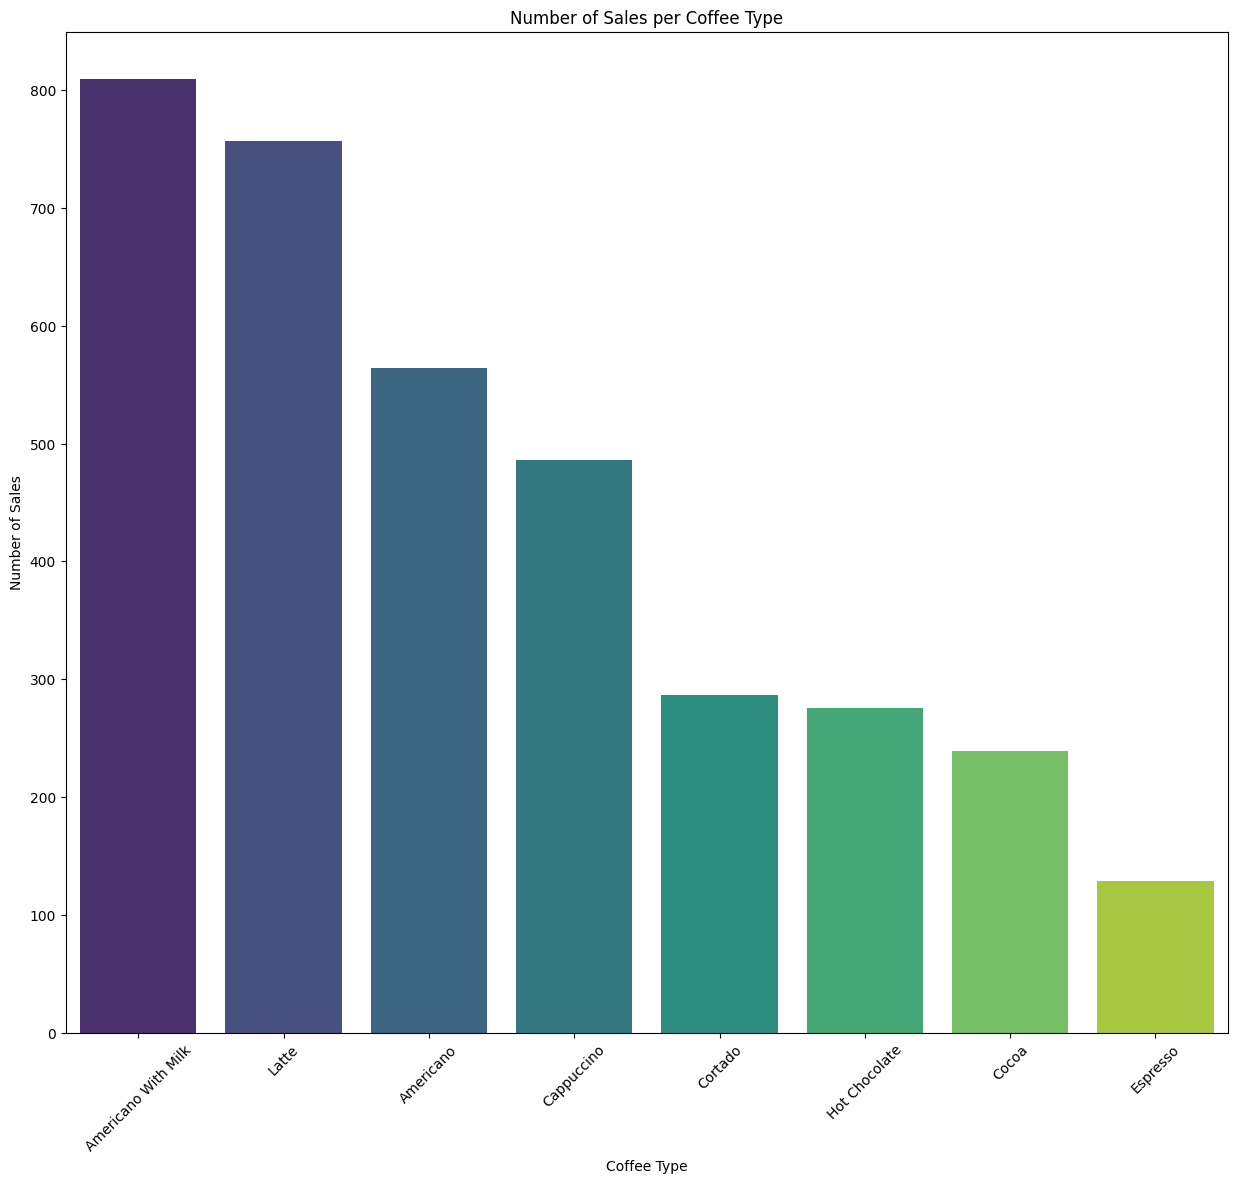

In [14]:
plt.figure(figsize=(15,13))
sns.countplot(data=df, x='coffee_name', order=df['coffee_name'].value_counts().index, palette='viridis')
plt.title("Number of Sales per Coffee Type")
plt.xlabel("Coffee Type")
plt.ylabel("Number of Sales")
plt.xticks(rotation=45)
plt.savefig("Barchart for Number of Sales per Coffee")

# Line Graph

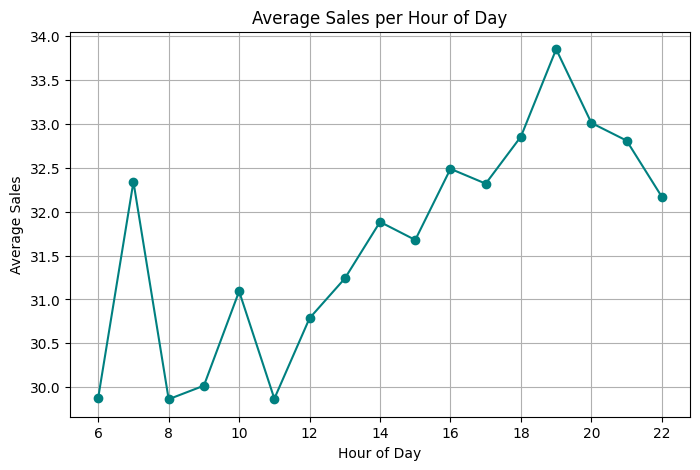

In [15]:
plt.figure(figsize=(8,5))
avg_sales = df.groupby('hour_of_day')['money'].mean()
plt.plot(avg_sales.index, avg_sales.values, marker='o', linestyle='-', color='teal')
plt.title("Average Sales per Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Sales")
plt.grid(True)
plt.savefig("LineGraph for Trend over the Time")

# Heatmap


 EDA Completed Successfully!


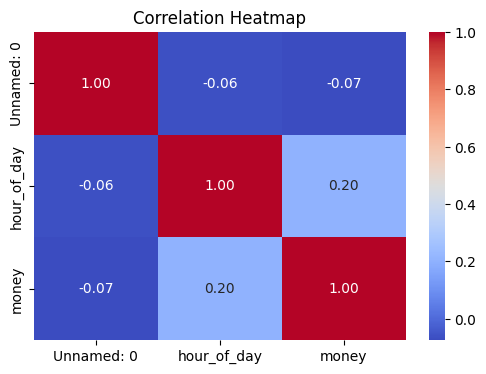

In [16]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig("Heatmap")

print("\n EDA Completed Successfully!")